In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, optimizers, losses, metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, recall_score
from sklearn.dummy import DummyClassifier
np.random.seed(42)

In [2]:
main_path = 'chest_xray/'
train_path = main_path + 'train/' 
val_path = main_path + 'val/'
test_path = main_path + 'test/'

In [3]:
train_n_path = train_path +'NORMAL/'
train_p_path = train_path +'PNEUMONIA/'

test_n_path = test_path+ 'NORMAL/'
test_p_path = test_path+ 'PNEUMONIA/'

In [4]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

In [5]:
def show_normal_images (number):
    plt.figure(figsize=(16,16))
    for n in range(number):
        normal_img = os.listdir(train_n_path)[n]
        normal_img_address = train_n_path+normal_img
        normal_load = Image.open(normal_img_address)
        ax = plt.subplot(5,5,n+1)
        plt.imshow(normal_load, cmap ='gray')
        plt.title("NORMAL")
        plt.axis("off")
        
def show_pneumonia_images (number):
    plt.figure(figsize=(16,16))
    for n in range(number):
        pneumonia_img =  os.listdir(train_p_path)[n]
        pneumonia_img_address = train_p_path+pneumonia_img
        pneumonia_load = Image.open(pneumonia_img_address)
        ax = plt.subplot(5,5,n+1)
        plt.imshow(pneumonia_load, cmap ='gray')
        plt.title("PNEUMONIA")
        plt.axis("off")

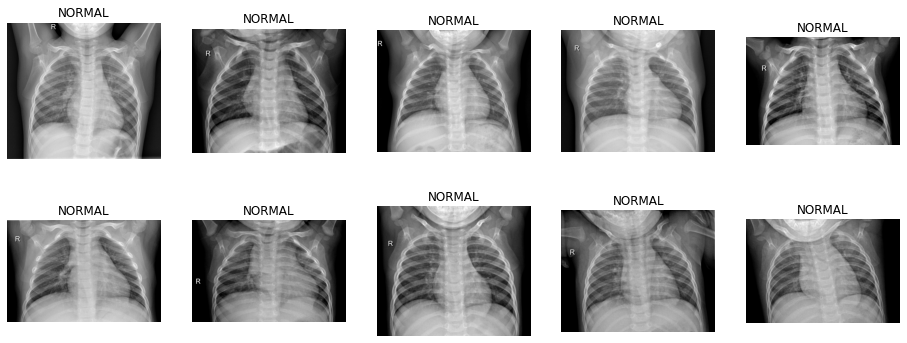

In [6]:
show_normal_images(10)

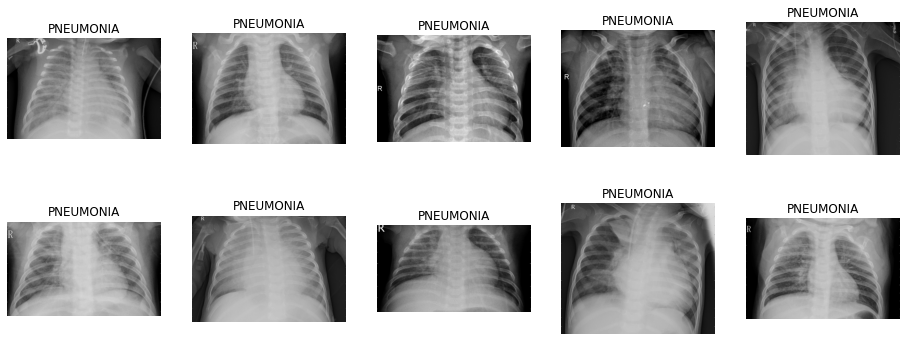

In [7]:
show_pneumonia_images(10)

In [5]:
img_dgen = ImageDataGenerator(rescale=1./255, validation_split = 0.20)

train_set = img_dgen.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='training')

validation_set = img_dgen.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='validation')

test_set = img_dgen.flow_from_directory(test_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', shuffle=False)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
simple_model = models.Sequential([
    layers.Dense(20, activation='relu', input_shape=(64, 64, 1)),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

simple_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

simple_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64, 64, 20)        40        
_________________________________________________________________
dense_1 (Dense)              (None, 64, 64, 7)         147       
_________________________________________________________________
dense_2 (Dense)              (None, 64, 64, 5)         40        
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 20481     
Total params: 20,708
Trainable params: 20,708
Non-trainable params: 0
_________________________________________________________________


In [11]:
simple_history = simple_model.fit(train_set,
                    epochs=25,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/25
131/131 [==============================] - 31s 235ms/step - loss: 0.4015 - accuracy: 0.8229 - val_loss: 0.2747 - val_accuracy: 0.8782
Epoch 2/25
131/131 [==============================] - 31s 240ms/step - loss: 0.1701 - accuracy: 0.9336 - val_loss: 0.1636 - val_accuracy: 0.9377
Epoch 3/25
131/131 [==============================] - 32s 243ms/step - loss: 0.1246 - accuracy: 0.9533 - val_loss: 0.1571 - val_accuracy: 0.9338
Epoch 4/25
131/131 [==============================] - 32s 241ms/step - loss: 0.1150 - accuracy: 0.9552 - val_loss: 0.1451 - val_accuracy: 0.9396
Epoch 5/25
131/131 [==============================] - 32s 246ms/step - loss: 0.1036 - accuracy: 0.9633 - val_loss: 0.1357 - val_accuracy: 0.9492
Epoch 6/25
131/131 [==============================] - 31s 237ms/step - loss: 0.0996 - accuracy: 0.9612 - val_loss: 0.1347 - val_accuracy: 0.9482
Epoch 7/25
131/131 [==============================] - 31s 238ms/step - loss: 0.0905 - accuracy: 0.9643 - val_loss: 0.1300 - val_ac

In [12]:
loss, acc = simple_model.evaluate(test_set)

20/20 [==============================] - 3s 143ms/step - loss: 1.9115 - accuracy: 0.7115


In [8]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'], )

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                802880    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
cnn_history = cnn_model.fit(train_set_aug,
                    epochs=25,
                    batch_size=32,
                    validation_data=validation_set)

In [18]:
loss_cnn, acc_cnn = cnn_model.evaluate(test_set)

20/20 [==============================] - 3s 152ms/step - loss: 2.6959 - accuracy: 0.7564


In [13]:
cnn2_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn2_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall')])

cnn2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [14]:
cnn2_history = cnn2_model.fit(train_set_aug,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 36s 275ms/step - loss: 0.5566 - accuracy: 0.7400 - recall: 0.9945 - val_loss: 0.5390 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 2/30
131/131 [==============================] - 35s 268ms/step - loss: 0.4829 - accuracy: 0.7426 - recall: 0.9994 - val_loss: 0.5145 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 3/30
131/131 [==============================] - 35s 268ms/step - loss: 0.4407 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5425 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 4/30
131/131 [==============================] - 36s 272ms/step - loss: 0.4088 - accuracy: 0.7570 - recall: 0.9913 - val_loss: 0.4886 - val_accuracy: 0.7603 - val_recall: 0.6916
Epoch 5/30
131/131 [==============================] - 36s 271ms/step - loss: 0.3896 - accuracy: 0.8112 - recall: 0.9352 - val_loss: 0.6087 - val_accuracy: 0.5523 - val_recall: 0.3974
Epoch 6/30
131/131 [==============================] - 35s 269ms/step - loss: 0.3548 -

In [16]:
cnn2_model.evaluate(test_set)

20/20 [==============================] - 3s 146ms/step - loss: 0.3464 - accuracy: 0.8462 - recall: 0.8282


[0.3464110195636749, 0.8461538553237915, 0.8282051086425781]

In [23]:
cnn3_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn3_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

cnn3_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)         

In [24]:
cnn3_history = cnn3_model.fit(train_set,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/10
131/131 [==============================] - 36s 276ms/step - loss: 0.3933 - accuracy: 0.8267 - val_loss: 0.2264 - val_accuracy: 0.9108
Epoch 2/10
131/131 [==============================] - 36s 272ms/step - loss: 0.1947 - accuracy: 0.9257 - val_loss: 0.1790 - val_accuracy: 0.9310
Epoch 3/10
131/131 [==============================] - 36s 272ms/step - loss: 0.1530 - accuracy: 0.9444 - val_loss: 0.1377 - val_accuracy: 0.9597
Epoch 4/10
131/131 [==============================] - 37s 279ms/step - loss: 0.1326 - accuracy: 0.9466 - val_loss: 0.1067 - val_accuracy: 0.9569
Epoch 5/10
131/131 [==============================] - 36s 272ms/step - loss: 0.1170 - accuracy: 0.9561 - val_loss: 0.0926 - val_accuracy: 0.9674
Epoch 6/10
131/131 [==============================] - 37s 281ms/step - loss: 0.1054 - accuracy: 0.9607 - val_loss: 0.0989 - val_accuracy: 0.9636
Epoch 7/10
131/131 [==============================] - 37s 281ms/step - loss: 0.0980 - accuracy: 0.9641 - val_loss: 0.1038 - val_ac

In [25]:
loss_cnn3, acc_cnn3 = cnn3_model.evaluate(test_set2)

20/20 [==============================] - 3s 162ms/step - loss: 0.7010 - accuracy: 0.7981


In [7]:
train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                   validation_split = 0.20,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_set_aug = train_datagen_aug.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='training')

Found 4173 images belonging to 2 classes.


In [7]:
cnn4_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=layers.LeakyReLU(), input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU()),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU()),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation=layers.LeakyReLU()),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn4_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn4_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        3

In [8]:
cnn4_history = cnn4_model.fit(train_set_aug,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 36s 278ms/step - loss: 0.5761 - accuracy: 0.7448 - recall: 0.9874 - auc: 0.5694 - prc: 0.7861 - val_loss: 0.6015 - val_accuracy: 0.6807 - val_recall: 0.6090 - val_auc: 0.8318 - val_prc: 0.9403
Epoch 2/30
131/131 [==============================] - 36s 275ms/step - loss: 0.4332 - accuracy: 0.7906 - recall: 0.9071 - auc: 0.8274 - prc: 0.9304 - val_loss: 0.4814 - val_accuracy: 0.7488 - val_recall: 0.6671 - val_auc: 0.9235 - val_prc: 0.9750
Epoch 3/30
131/131 [==============================] - 36s 276ms/step - loss: 0.3458 - accuracy: 0.8447 - recall: 0.9132 - auc: 0.8988 - prc: 0.9616 - val_loss: 0.2979 - val_accuracy: 0.8782 - val_recall: 0.9600 - val_auc: 0.9519 - val_prc: 0.9844
Epoch 4/30
131/131 [==============================] - 36s 276ms/step - loss: 0.3294 - accuracy: 0.8459 - recall: 0.9094 - auc: 0.9092 - prc: 0.9661 - val_loss: 0.6511 - val_accuracy: 0.6596 - val_recall: 0.5419 - val_auc: 0.9558 - val_prc: 0.9855
Epoch 5/30
1

In [42]:
cnn4_model.evaluate(test_set)

20/20 [==============================] - 3s 138ms/step - loss: 0.2704 - accuracy: 0.9103 - recall: 0.9590 - auc: 0.9512 - prc: 0.9628


[0.2703840434551239,
 0.9102563858032227,
 0.9589743614196777,
 0.9512491226196289,
 0.962823212146759]

In [43]:
y_pred = cnn4_model.predict(test_set)

In [44]:
y_pred = (y_pred>0.5).astype(np.int)
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [45]:
print(classification_report(test_set.classes, y_pred, target_names = ['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.92      0.83      0.87       234
   Pneumonia       0.90      0.96      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



In [80]:
plot_confusion_matrix(cnn4_model, test_set.classes, y_pred)

ValueError: plot_confusion_matrix only supports classifiers

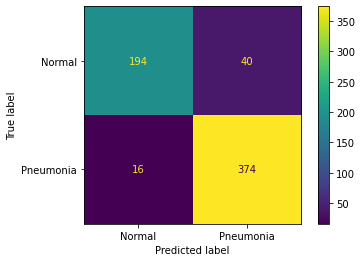

In [78]:
display(ConfusionMatrixDisplay(confusion_matrix(test_set.classes, y_pred), display_labels=['Normal', 'Pneumonia']).plot());

In [ ]:
def show_metrics(history):
    results = history.history
    plt.figure()
    plt.plot(results['val_accuracy'], label = 'Validation Accuracy')
    plt.plot(results['accuracy'], label = 'Train Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show();
    
    plt.figure()
    plt.plot(results['val_recall'], label = 'Validation Recall')
    plt.plot(history['recall'], label = 'Train Recall')
    plt.title('Recall Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend
    plt.show();
    
    plt.figure()
    plt.plot(results['val_loss'], label = 'Validation Loss')
    plt.plot(results['loss'], label = 'Train Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend
    plt.show();

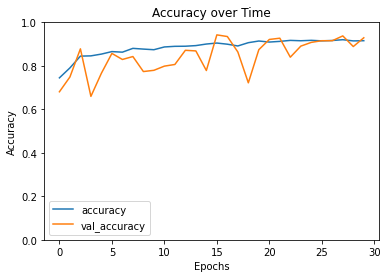

In [47]:
plt.plot(cnn4_history.history['accuracy'], label='accuracy')
plt.plot(cnn4_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title("Accuracy over Time")
plt.legend()
plt.show()

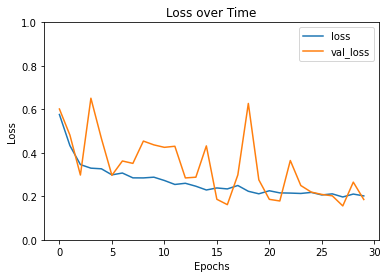

In [48]:
plt.plot(cnn4_history.history['loss'], label='loss')
plt.plot(cnn4_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.title("Loss over Time")
plt.legend()
plt.show()

In [17]:
cnn5_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn5_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn5_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)       

In [19]:
cnn5_history = cnn5_model.fit(train_set_aug,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 38s 290ms/step - loss: 0.5560 - accuracy: 0.7407 - recall: 0.9929 - auc: 0.6093 - prc: 0.8176 - val_loss: 0.5428 - val_accuracy: 0.7430 - val_recall: 1.0000 - val_auc: 0.7834 - val_prc: 0.9248
Epoch 2/30
131/131 [==============================] - 37s 285ms/step - loss: 0.4624 - accuracy: 0.7474 - recall: 0.9642 - auc: 0.7909 - prc: 0.9153 - val_loss: 0.5448 - val_accuracy: 0.7306 - val_recall: 0.6555 - val_auc: 0.8740 - val_prc: 0.9575
Epoch 3/30
131/131 [==============================] - 37s 285ms/step - loss: 0.3802 - accuracy: 0.8119 - recall: 0.9113 - auc: 0.8724 - prc: 0.9538 - val_loss: 0.6519 - val_accuracy: 0.5791 - val_recall: 0.4335 - val_auc: 0.8919 - val_prc: 0.9651
Epoch 4/30
131/131 [==============================] - 36s 278ms/step - loss: 0.3675 - accuracy: 0.8212 - recall: 0.8974 - auc: 0.8804 - prc: 0.9570 - val_loss: 0.6455 - val_accuracy: 0.5580 - val_recall: 0.4052 - val_auc: 0.9058 - val_prc: 0.9696
Epoch 5/30
1

In [20]:
cnn5_model.evaluate(test_set)

20/20 [==============================] - 3s 145ms/step - loss: 0.3527 - accuracy: 0.8526 - recall: 0.9564 - auc: 0.9333 - prc: 0.9552


[0.35273319482803345,
 0.8525640964508057,
 0.9564102292060852,
 0.9333223104476929,
 0.9551893472671509]

In [21]:
cnn6_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=layers.LeakyReLU(), input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU()),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU()),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation=layers.LeakyReLU()),
    layers.Dense(64, activation=layers.LeakyReLU()),
    layers.Dense(1, activation='sigmoid')
])

cnn6_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn6_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)       

In [22]:
cnn6_history = cnn6_model.fit(train_set_aug,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 39s 294ms/step - loss: 0.5859 - accuracy: 0.7410 - recall: 0.9923 - auc: 0.5204 - prc: 0.7579 - val_loss: 0.5547 - val_accuracy: 0.7430 - val_recall: 1.0000 - val_auc: 0.6328 - val_prc: 0.8496
Epoch 2/30
131/131 [==============================] - 38s 287ms/step - loss: 0.4792 - accuracy: 0.7561 - recall: 0.9390 - auc: 0.7714 - prc: 0.9046 - val_loss: 0.4387 - val_accuracy: 0.7852 - val_recall: 0.9613 - val_auc: 0.8255 - val_prc: 0.9368
Epoch 3/30
131/131 [==============================] - 37s 285ms/step - loss: 0.3951 - accuracy: 0.8148 - recall: 0.9200 - auc: 0.8604 - prc: 0.9467 - val_loss: 0.7252 - val_accuracy: 0.6433 - val_recall: 0.5200 - val_auc: 0.9123 - val_prc: 0.9713
Epoch 4/30
131/131 [==============================] - 38s 288ms/step - loss: 0.3311 - accuracy: 0.8433 - recall: 0.9081 - auc: 0.9071 - prc: 0.9666 - val_loss: 0.4067 - val_accuracy: 0.8025 - val_recall: 0.7355 - val_auc: 0.9408 - val_prc: 0.9813
Epoch 5/30
1

In [23]:
cnn6_model.evaluate(test_set)

20/20 [==============================] - 3s 138ms/step - loss: 0.3228 - accuracy: 0.8766 - recall: 0.9590 - auc: 0.9480 - prc: 0.9660


[0.32282358407974243,
 0.8766025900840759,
 0.9589743614196777,
 0.9480330944061279,
 0.966035783290863]

In [56]:
train_imgs = len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))
normal_imgs = len(os.listdir(train_n_path))
pneu_imgs = len(os.listdir(train_p_path))

weight_for_0 = train_imgs / (2 * normal_imgs)
weight_for_1 = normal_imgs / (2 * pneu_imgs)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [57]:
class_weight

{0: 1.9448173005219984, 1: 0.6730322580645162}

In [58]:
cnn4_model_weighted = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=layers.LeakyReLU(), input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU()),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU()),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation=layers.LeakyReLU()),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn4_model_weighted.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn4_model_weighted.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)       

In [59]:
cnn4_weighted_history = cnn4_model_weighted.fit(train_set_aug,
                    epochs=30,
                    validation_data=validation_set, class_weight=class_weight)

Epoch 1/30
131/131 [==============================] - 36s 274ms/step - loss: 0.6707 - accuracy: 0.5814 - recall: 0.5677 - auc: 0.6308 - prc: 0.8120 - val_loss: 0.6513 - val_accuracy: 0.6002 - val_recall: 0.6710 - val_auc: 0.6150 - val_prc: 0.8434
Epoch 2/30
131/131 [==============================] - 34s 261ms/step - loss: 0.5752 - accuracy: 0.6957 - recall: 0.6719 - auc: 0.7681 - prc: 0.9043 - val_loss: 0.5213 - val_accuracy: 0.6980 - val_recall: 0.6490 - val_auc: 0.8191 - val_prc: 0.9362
Epoch 3/30
131/131 [==============================] - 34s 262ms/step - loss: 0.4765 - accuracy: 0.7517 - recall: 0.7255 - auc: 0.8505 - prc: 0.9420 - val_loss: 0.5839 - val_accuracy: 0.6644 - val_recall: 0.5523 - val_auc: 0.9022 - val_prc: 0.9660
Epoch 4/30
131/131 [==============================] - 34s 262ms/step - loss: 0.4013 - accuracy: 0.8054 - recall: 0.7887 - auc: 0.8982 - prc: 0.9628 - val_loss: 0.7355 - val_accuracy: 0.6405 - val_recall: 0.5161 - val_auc: 0.9374 - val_prc: 0.9789
Epoch 5/30
1

In [60]:
cnn4_model_weighted.evaluate(test_set)

20/20 [==============================] - 3s 144ms/step - loss: 0.2813 - accuracy: 0.8910 - recall: 0.9487 - auc: 0.9530 - prc: 0.9697


[0.2812657952308655,
 0.8910256624221802,
 0.9487179517745972,
 0.9529531002044678,
 0.9697341918945312]

In [70]:
train_set_dummy = img_dgen.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='training', batch_size=4173)

test_set_dummy = img_dgen.flow_from_directory(test_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', shuffle=False, batch_size=624)

Found 4173 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [71]:
train_images, train_labels = next(train_set_dummy)
test_images, test_labels = next(test_set_dummy)

In [72]:
train_images.shape

(4173, 64, 64, 1)

In [73]:
test_images.shape

(624, 64, 64, 1)

In [74]:
# dummy classifer
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(train_images, train_labels)

DummyClassifier(strategy='most_frequent')

In [75]:
baseline_model.score(test_images, test_labels)

0.625

In [83]:
y_pred_base = baseline_model.predict(test_images)

In [84]:
recall_score(test_labels, y_pred_base)

1.0

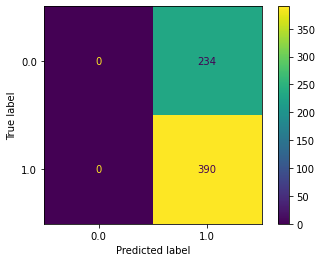

In [85]:
plot_confusion_matrix(baseline_model, test_images, test_labels)

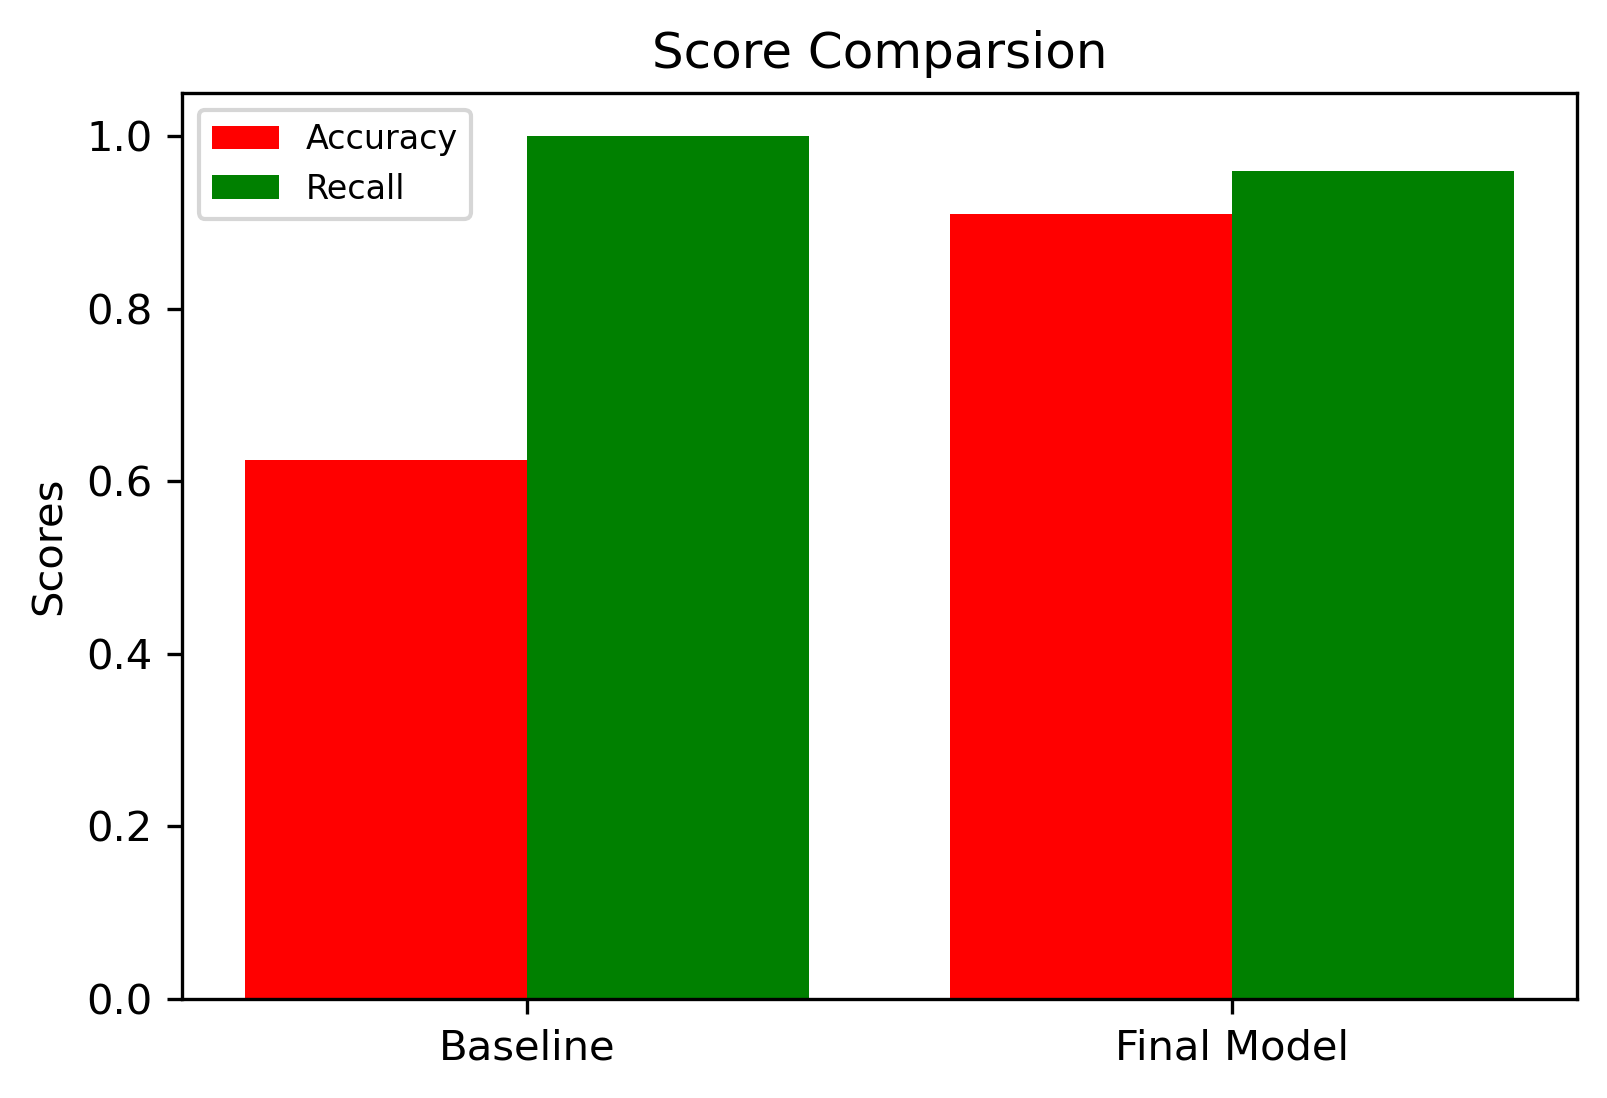

In [94]:
x = np.arange(2)
acc_scores = [0.625, 0.910]
prec_scores = [1.0, 0.959]
width = 0.4

fig, ax = plt.subplots(dpi=300)
plt.bar(x - 0.2, acc_scores, width, color='r')
plt.bar(x + 0.2, prec_scores, width, color='g')
plt.xticks(x, ['Baseline', 'Final Model'])
plt.ylabel('Scores')
plt.title('Score Comparsion')
ax.legend(['Accuracy', 'Recall'], fontsize=8)
plt.savefig('Images/Comparison.png');